<h1><center>CS 455/595a: Support Vector Machines Demos</center></h1>
<center>Richard S. Stansbury</center>

This notebook applies the support vector machine concepts covered in [1] with the [Titanic](https://www.kaggle.com/c/titanic/) and [Boston Housing](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) data sets for SVM-based classification and regression, respectively.



Reference:

[1] Aurelen Geron. *Hands on Machine Learning with Scikit-Learn & TensorFlow* O'Reilley Media Inc, 2017.

[2] Aurelen Geron. "ageron/handson-ml: A series of Jupyter notebooks that walk you through the fundamentals of Machine Learning and Deep Learning in python using Scikit-Learn and TensorFlow." Github.com, online at: https://github.com/ageron/handson-ml [last accessed 2019-03-01]

**Table of Contents**
1. [Titanic Survivor Classifier w/ SVM](#Titanic-Survivor-Classifier)
    * [Linear SVC Demonstration](#Linear-SVC-Demonstration)
    * [SVC with Linear Kernel Demo](#SVC-with-Linear-Kernel-Demo)
    * [LinearSVC with Polynomial Features](#LinearSVC-with-Polynomial-Features)
    * [SVC Classifier with Polynomial Kernel](SVC-Classifier-with-Polynomial-Kernel)
    * [SVC with RBF Kernel](#SVC-with-RBF-Kernel)

2. Boston Demo - Coming Soon

# Titanic Survivor Classifier

## Set up

In [1]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC, LinearSVC, SVR, LinearSVR
from sklearn import datasets

from matplotlib import pyplot as plt
%matplotlib inline 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score 
from sklearn.metrics import mean_squared_error, mean_absolute_error

import numpy as np
import pandas as pd
import os

# Read data from input files into Pandas data frames
data_path = os.path.join("datasets","titanic")
train_filename = "train.csv"
test_filename = "test.csv"

def read_csv(data_path, filename):
    joined_path = os.path.join(data_path, filename)
    return pd.read_csv(joined_path)

# Read CSV file into Pandas Dataframes
train_df = read_csv(data_path, train_filename)


# Defining Data Pre-Processing Pipelines
class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attributes):
        self.attributes = attributes
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attributes]

class MostFrequentImputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        self.most_frequent = pd.Series([X[c].value_counts().index[0] for c in X], 
                                       index = X.columns)
        return self
    
    def transform(self, X):
        return X.fillna(self.most_frequent)

    
numeric_pipe = Pipeline([
        ("Select", DataFrameSelector(["Age", "Fare", "SibSp", "Parch"])), # Selects Fields from dataframe
        ("Imputer", SimpleImputer(strategy="median")),   # Fills in NaN w/ median value for its column
    ])

categories_pipe = Pipeline([
        ("Select", DataFrameSelector(["Pclass", "Sex"])), # Selects Fields from dataframe
        ("MostFreqImp", MostFrequentImputer()), # Fill in NaN with most frequent
        ("OneHot", OneHotEncoder(sparse=False)), # Onehot encode
    ])

preprocessing_pipe = FeatureUnion(transformer_list = [
        ("numeric pipeline", numeric_pipe), 
        ("categories pipeline", categories_pipe)
     ]) 

# Process Input Data Using Pipleines
train_X_data = preprocessing_pipe.fit_transform(train_df)

# Scale Input Data
s = StandardScaler()
train_X_data = s.fit_transform(train_X_data)

train_y_data = train_df["Survived"]

## KNN Classifier (for comparison)

In [2]:
# KNN Classifier 10-fold Validation
k=10
clf = KNeighborsClassifier(n_neighbors=k)

y_pred = cross_val_predict(clf, train_X_data, train_y_data, cv=5)

print("Confusion Matrix:")
print(confusion_matrix(train_y_data, y_pred))
print("Accuracy Score = " + str(accuracy_score(train_y_data, y_pred)))
print("Pecision Score = " + str(precision_score(train_y_data, y_pred)))
print("Recall Score = " + str(recall_score(train_y_data,y_pred)))
print("F1 Score = " + str(f1_score(train_y_data,y_pred)))                            
                               

Confusion Matrix:
[[493  56]
 [119 223]]
Accuracy Score = 0.8035914702581369
Pecision Score = 0.7992831541218638
Recall Score = 0.652046783625731
F1 Score = 0.7181964573268921


## Linear SVC Demonstration

In [3]:
# LinearSVC Classifier - Hard Margin 
clf = LinearSVC(C=10, loss="hinge")

y_pred = cross_val_predict(clf, train_X_data, train_y_data, cv=5)

print("Confusion Matrix:")
print(confusion_matrix(train_y_data, y_pred))
print("Accuracy Score = " + str(accuracy_score(train_y_data, y_pred)))
print("Pecision Score = " + str(precision_score(train_y_data, y_pred)))
print("Recall Score = " + str(recall_score(train_y_data,y_pred)))
print("F1 Score = " + str(f1_score(train_y_data,y_pred)))                                                       

Confusion Matrix:
[[469  80]
 [109 233]]
Accuracy Score = 0.7878787878787878
Pecision Score = 0.744408945686901
Recall Score = 0.6812865497076024
F1 Score = 0.7114503816793893


C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [4]:
# LinearSVC Classifier - Soft Margin
clf = LinearSVC(C=1, loss="hinge")
y_pred = cross_val_predict(clf, train_X_data, train_y_data, cv=5)

print("Confusion Matrix:")
print(confusion_matrix(train_y_data, y_pred))
print("Accuracy Score = " + str(accuracy_score(train_y_data, y_pred)))
print("Pecision Score = " + str(precision_score(train_y_data, y_pred)))
print("Recall Score = " + str(recall_score(train_y_data,y_pred)))
print("F1 Score = " + str(f1_score(train_y_data,y_pred)))                            
                               

C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Confusion Matrix:
[[469  80]
 [109 233]]
Accuracy Score = 0.7878787878787878
Pecision Score = 0.744408945686901
Recall Score = 0.6812865497076024
F1 Score = 0.7114503816793893


In [5]:
# Grid Search for Best HyperParameters

param_grid = [{'loss' :['hinge'],'C': [0.1,1,10,100,1000]}]

clf = LinearSVC(loss="hinge")

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(train_X_data, train_y_data)

grid_search.best_params_ 


C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increa

{'C': 1, 'loss': 'hinge'}

## SVC with Linear Kernel Demo

In [6]:
param_grid = [{'C': [0.1,1,10]}]

clf = SVC(cache_size=1000, kernel='linear')

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(train_X_data, train_y_data)

grid_search.best_params_ 
                            

{'C': 10}

In [7]:
# SVC Classifier 
c=10
clf = SVC(kernel="linear", C=c)

y_pred = cross_val_predict(clf, train_X_data, train_y_data, cv=5)

print("Confusion Matrix:")
print(confusion_matrix(train_y_data, y_pred))
print("Accuracy Score = " + str(accuracy_score(train_y_data, y_pred)))
print("Pecision Score = " + str(precision_score(train_y_data, y_pred)))
print("Recall Score = " + str(recall_score(train_y_data,y_pred)))
print("F1 Score = " + str(f1_score(train_y_data,y_pred)))                            
                               

Confusion Matrix:
[[469  80]
 [109 233]]
Accuracy Score = 0.7878787878787878
Pecision Score = 0.744408945686901
Recall Score = 0.6812865497076024
F1 Score = 0.7114503816793893


## LinearSVC with Polynomial Features

In [8]:
# SVC Classifier with Polynomial Features Added
clf_pipe = Pipeline([
        ("Polynomial", PolynomialFeatures()),
        ("Scaler", StandardScaler()),
        ("Classifier", LinearSVC(loss="hinge")), 
    ])

param_grid = [{'Polynomial__degree' :[1,2,3],'Classifier__C': [0.01, 0.1,1,10,100]}]


grid_search = GridSearchCV(clf_pipe, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(train_X_data, train_y_data)

grid_search.best_params_                             
                               

C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increa

C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increa

{'Classifier__C': 0.01, 'Polynomial__degree': 3}

In [9]:
# SVC Classifier with Polynomial Features Added
c=0.01
deg=3

clf_pipe = Pipeline([
        ("Polynomial", PolynomialFeatures(degree=deg)),
        ("Scaler", StandardScaler()),
        ("classifier", LinearSVC(loss="hinge", max_iter=10000, C=c)), 
    ])

y_pred = cross_val_predict(clf_pipe, train_X_data, train_y_data, cv=5)

print("Confusion Matrix:")
print(confusion_matrix(train_y_data, y_pred))
print("Accuracy Score = " + str(accuracy_score(train_y_data, y_pred)))
print("Pecision Score = " + str(precision_score(train_y_data, y_pred)))
print("Recall Score = " + str(recall_score(train_y_data,y_pred)))
print("F1 Score = " + str(f1_score(train_y_data,y_pred)))                            
                               

Confusion Matrix:
[[492  57]
 [106 236]]
Accuracy Score = 0.8170594837261503
Pecision Score = 0.8054607508532423
Recall Score = 0.6900584795321637
F1 Score = 0.7433070866141731


## SVC Classifier with Polynomial Kernel

In [10]:
# Examine parameters using Grid Search

param_grid = [{'C': [0.1,1,10], 'coef0':[0,0.1,10,100]}]

clf = SVC(kernel='poly', degree=2, gamma='scale')
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(train_X_data, train_y_data)

grid_search.best_params_                                

{'C': 1, 'coef0': 0}

In [11]:
# SVC Classifier with Polynomial Kernel
C=10
deg=2
r=100

clf = SVC(kernel="poly", gamma='scale',degree=deg, coef0=r, C=C)
    
y_pred = cross_val_predict(clf, train_X_data, train_y_data, cv=5)

print("Confusion Matrix:")
print(confusion_matrix(train_y_data, y_pred))
print("Accuracy Score = " + str(accuracy_score(train_y_data, y_pred)))
print("Pecision Score = " + str(precision_score(train_y_data, y_pred)))
print("Recall Score = " + str(recall_score(train_y_data,y_pred)))
print("F1 Score = " + str(f1_score(train_y_data,y_pred)))                            
                               

Confusion Matrix:
[[489  60]
 [101 241]]
Accuracy Score = 0.819304152637486
Pecision Score = 0.8006644518272426
Recall Score = 0.7046783625730995
F1 Score = 0.7496111975116642


## SVC with RBF Kernel

In [12]:
import scipy as sp
# Examine parameters using Grid Search
param_grid = {'C': sp.stats.uniform(0.01,10), 
              'gamma':sp.stats.uniform(0.001,10)}

clf = SVC(kernel='rbf')
rand_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=100, cv=5, scoring='roc_auc')
rand_search.fit(train_X_data, train_y_data)

print(rand_search.best_params_)

results = rand_search.cv_results_
for mean_score, params in zip(results["mean_test_score"],results["params"]):
    print(mean_score, params)

{'C': 2.3707085458538, 'gamma': 0.2192528545950102}
0.7745263925107599 {'C': 6.123829364921926, 'gamma': 9.877547145332587}
0.7868830792709053 {'C': 5.174371088544534, 'gamma': 4.814875933113863}
0.795143245148163 {'C': 5.087669225286556, 'gamma': 1.312945231490078}
0.7896147278055593 {'C': 4.840065861181587, 'gamma': 5.389441313692711}
0.7857309551640885 {'C': 4.796875908129039, 'gamma': 6.818819353511562}
0.8030747603551713 {'C': 1.0164311054869002, 'gamma': 4.328786321943275}
0.7758482079514502 {'C': 5.928043959169763, 'gamma': 9.86407814264108}
0.8180782617934943 {'C': 3.523546852060635, 'gamma': 0.3442953007124018}
0.7890474228492009 {'C': 3.8563893336173045, 'gamma': 4.898348985512558}
0.7746139526284058 {'C': 8.338723988106045, 'gamma': 5.643547463635005}
0.7968400530705577 {'C': 1.6463815912965163, 'gamma': 7.215595134646481}
0.8270740598129436 {'C': 9.862660288208547, 'gamma': 0.19981045919828866}
0.8049926690279751 {'C': 0.8476922850038981, 'gamma': 3.836403695621454}
0.79126

C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
# SVC Classifier with Gaussian Radial Basis Function Kernel
C=2.0
gamma=0.2

clf = SVC(kernel="rbf", C=C, gamma=gamma) 

y_pred = cross_val_predict(clf, train_X_data, train_y_data, cv=5)

print("Confusion Matrix:")
print(confusion_matrix(train_y_data, y_pred))
print("Accuracy Score = " + str(accuracy_score(train_y_data, y_pred)))
print("Pecision Score = " + str(precision_score(train_y_data, y_pred)))
print("Recall Score = " + str(recall_score(train_y_data,y_pred)))
print("F1 Score = " + str(f1_score(train_y_data,y_pred)))                            
                               

Confusion Matrix:
[[493  56]
 [ 99 243]]
Accuracy Score = 0.8260381593714927
Pecision Score = 0.8127090301003345
Recall Score = 0.7105263157894737
F1 Score = 0.7581903276131046


In [14]:
# Load Data Set
boston_housing_data = datasets.load_boston()

# Build data frame for visualization
boston_df = pd.DataFrame(np.c_[boston_housing_data.data, boston_housing_data.target], 
                  columns=["CRIM", "ZN","INDUS","CHAS", "NOX","RM","AGE",
                           "DIS","RAD","TAX","PTRatio","BK", "LSTAT","MEDV"])

scaler = StandardScaler()
boston_data_set = scaler.fit_transform(boston_housing_data.data)
train_X, test_X, train_y, test_y = train_test_split(boston_data_set,
                                                   boston_housing_data.target,
                                                   test_size=0.33)


def plot_learning_curves(model, X, y):
    """
    Plots performance on the training set and testing (validation) set.
    X-axis - number of training samples used
    Y-axis - RMSE
    """
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.20)
    
    training_errors, validation_errors = [], []
    
    for m in range(1, len(train_X)):
        
        model.fit(train_X[:m], train_y[:m])
        
        train_pred = model.predict(train_X)
        test_pred = model.predict(test_X)
        
        training_errors.append(np.sqrt(mean_squared_error(train_y, train_pred)))
        validation_errors.append(np.sqrt(mean_squared_error(test_y, test_pred)))
        
    plt.plot(training_errors, "r-+", label="train")
    plt.plot(validation_errors, "b-", label="test")
    plt.legend()
    plt.axis([0, 80, 0, 3])

In [36]:
# Examine parameters using Grid Search

param_grid = [{'LinearSVR__epsilon': [0.05,0.1,0.5,1.5,10]}]
deg = 3

clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("LinearSVR", LinearSVR(max_iter=10000)),
    ])

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_X_data, train_y_data)

grid_search.best_params_  

C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increa

{'LinearSVR__epsilon': 0.05}

C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increa

C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increa

3.4768755314497986

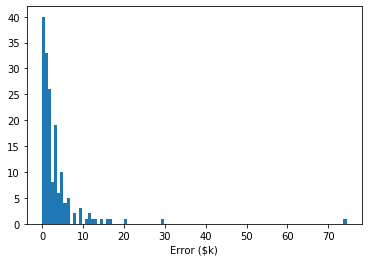

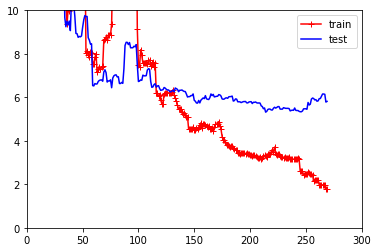

In [35]:
deg = 3

clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("LinearSVR", LinearSVR(epsilon=0.1, max_iter=10000)),
    ])
    
clf.fit(train_X,train_y)
pred_y = clf.predict(test_X)

plt.figure("a")
plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

plt.figure("b")
plot_learning_curves(clf, train_X, train_y)
plt.axis([0,300,0,10])

mean_absolute_error(test_y, pred_y)

In [17]:
# Examine parameters using Grid Search

param_grid = [{'epsilon': [0.05,0.1,0.5,1.5], 'C':[0.1,1,10,100]}]
deg = 2

clf = SVR(degree=deg, kernel='rbf', gamma='scale')

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_X_data, train_y_data)

grid_search.best_params_  

{'C': 1, 'epsilon': 0.1}

3.2745176933276765

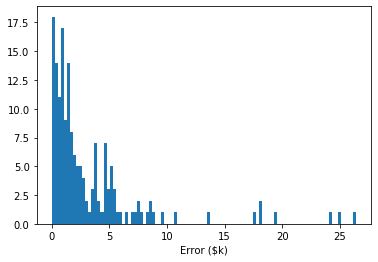

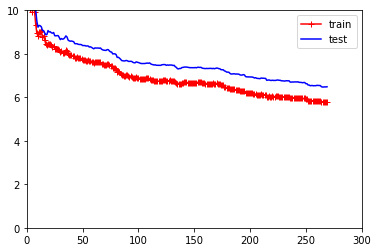

In [34]:
deg = 2

clf = SVR(kernel='rbf', epsilon=0.1, C=1, max_iter=10000, gamma='scale')

    
clf.fit(train_X,train_y)
pred_y = clf.predict(test_X)

plt.figure("a")
plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

plt.figure("b")
plot_learning_curves(clf, train_X, train_y)
plt.axis([0,300,0,10])

mean_absolute_error(test_y, pred_y)